In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Let's run calibration...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from LeCheapEyeTracker import Client, Server

In [3]:
fps = 30
T = 7.

calib = Client(et=Server(), timeline=np.linspace(0, T, T*fps), downscale=2)
calib.app.run()
calib.et.close()

window size :  (2560, 1440)
target dynamic :
 [(0.5, 0.014667034149169922), (0.5, 0.2224571704864502), (0.5, 0.32680201530456543), (0.5, 0.432279109954834), (0.5, 0.536566972732544), (0.5, 0.6406760215759277), (0.5, 0.74440598487854), (0.5, 0.8487081527709961), (0.5, 0.9529819488525391), (0.5, 1.0573229789733887), (0.5, 1.1598639488220215), (0.5, 1.2625610828399658), (0.5, 1.3661401271820068), (0.5, 1.4711589813232422), (0.5, 1.5750060081481934), (0.5, 1.6781351566314697), (0.5, 1.7824411392211914), (0.5, 1.8851110935211182), (0.5, 1.988847017288208), (0.33, 2.0929131507873535), (0.33, 2.1955759525299072), (0.33, 2.299813985824585), (0.33, 2.403409957885742), (0.33, 2.5065231323242188), (0.33, 2.6091501712799072), (0.33, 2.712779998779297), (0.33, 2.8186049461364746), (0.33, 2.9219810962677), (0.5, 3.025712013244629), (0.5, 3.129183053970337), (0.5, 3.2307770252227783), (0.5, 3.3335580825805664), (0.5, 3.4378249645233154), (0.5, 3.5435791015625), (0.5, 3.6477770805358887), (0.5, 3.7519

/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [9]:
stim_x = np.array([])
eye_x = np.array([])

for stim in calib.stims_X_t:
    x, stash = stim
    stim_x = np.append(stim_x, x)
    
for eye in calib.et.eye_x_t:
    y, stash = eye
    eye_x = np.append(eye_x, y)

print (len(stim_x)==len(eye_x))

True


## ...and plot eye and targets x_positions 

<function matplotlib.pyplot.show>

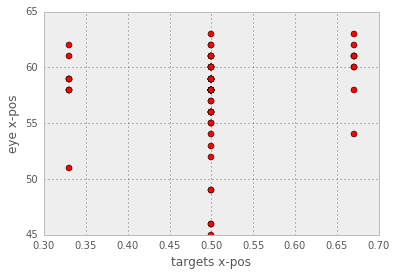

In [10]:
plt.plot(stim_x, eye_x, 'ro')
plt.xlabel('targets x-pos')
plt.ylabel('eye x-pos')
plt.show

In [11]:
! git commit -am 'Ckecking the coordinates system of eye location in OpenCV '

[master 6c076f9] Ckecking the coordinates system of eye location in OpenCV
 1 file changed, 104 insertions(+), 15 deletions(-)


In [12]:
! git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../src/my_eye.png

nothing added to commit but untracked files present (use "git add" to track)


In [13]:
! git push

Counting objects: 4, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 13.61 KiB | 0 bytes/s, done.
Total 4 (delta 2), reused 0 (delta 0)
To https://github.com/meduz/LeCheapEyeTracker
   676a107..6c076f9  master -> master
